In [88]:
%reset -f

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
%matplotlib inline

## Import the data

In [90]:
X=pd.read_csv('train_call.tsv', sep='\t')
y=pd.read_csv('train_clinical.txt', sep='\t', index_col=0)

## Transpose X and remove the first 4 rows

In [91]:
X = X.transpose()
X = X.tail(-4)

## Split to train and test data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Selection on training data

In [93]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train.values.ravel())
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 50


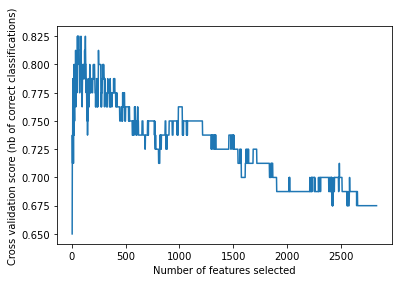

In [94]:
# Get the cross-validation scores
cv_scores = rfecv.cv_results_['mean_test_score']

# Plot number of Features Vs Cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
plt.show()

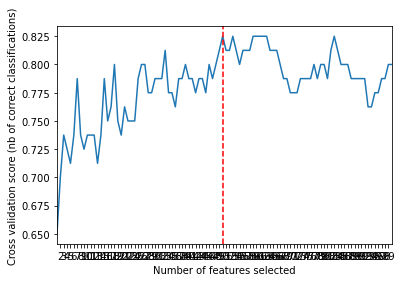

In [95]:
# Zooming in
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(cv_scores) + 1), cv_scores)
if rfecv.n_features_%10 == 0:
    plt.xticks(list(range(2,rfecv.n_features_*2)))
else:
    plt.xticks(list(range(2,rfecv.n_features_*3,rfecv.n_features_%10)))
plt.axvline(x=rfecv.n_features_, linestyle='--', color='red')
plt.xlim([1, rfecv.n_features_ * 2])
plt.show()

In [96]:
features = list(X_train.columns[rfecv.support_])
print('Best features :', features)

Best features : [30, 39, 40, 230, 263, 396, 619, 623, 746, 761, 819, 851, 985, 1055, 1061, 1143, 1243, 1562, 1656, 1663, 1672, 1713, 1740, 1882, 1897, 1900, 1901, 1902, 1973, 2021, 2024, 2026, 2027, 2183, 2184, 2207, 2210, 2213, 2214, 2329, 2384, 2423, 2430, 2500, 2501, 2547, 2742, 2750, 2760, 2770]


In [97]:
X_train, X_test = X_train.filter(features), X_test.filter(features)

In [98]:
#Support Vector Machines
SV = SVC(random_state=42)
SV.fit(X_train, y_train.values.ravel())
y_pred = SV.predict(X_test)
print('SVM Classifier Training Accuracy:', accuracy_score(y_test, y_pred))

SVM Classifier Training Accuracy: 0.8


In [99]:
# Split the data into training and validation sets (80/20 split)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# SVM with Hyper Parameters Tuning
SV_0 = SVC(probability=True, random_state=42)

params = {'C': [0.1, 1, 10, 100],
          'gamma': [1, 0.1, 0.01, 0.001, 'scale', 'auto'],
          'kernel': ['linear', 'poly', 'rbf']}

# Use the validation set for cross-validation during hyperparameter optimization
SV_1 = GridSearchCV(SV_0, param_grid=params, n_jobs=-1, cv=StratifiedKFold(10), scoring= 'accuracy')
result = SV_1.fit(X_train_split, y_train_split.values.ravel())
print("Best Hyper Parameters:\n", result.best_params_)

Best Hyper Parameters:
 {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [100]:
# Calculate the training accuracy
SV = SVC(random_state=42, C=0.1, gamma=1, kernel='linear')
SV.fit(X_train, y_train.values.ravel())
y_pred = SV.predict(X_test)
print('SVM Classifier Training Accuracy:', accuracy_score(y_test, y_pred))

SVM Classifier Training Accuracy: 0.8


In [101]:
# Calculate the validation accuracy
SV = SVC(random_state=42, C=0.1, gamma=1, kernel='linear')
SV.fit(X_val, y_val.values.ravel())
y_pred = SV.predict(X_test)
print('SVM Classifier Validation Accuracy:', accuracy_score(y_test, y_pred))

SVM Classifier Validation Accuracy: 0.75


In [102]:
# Compare the training and validation accuracy
if abs(accuracy_score(y_test, y_pred) - accuracy_score(y_test, y_pred)) < 0.05:
    print("The model is not overfitting.")
else:
    print("The model might be overfitting.")

The model is not overfitting.
